In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
df = pd.read_csv("penguins.csv")
df = df.dropna()  
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


<AxesSubplot:xlabel='body_mass_g', ylabel='culmen_length_mm'>

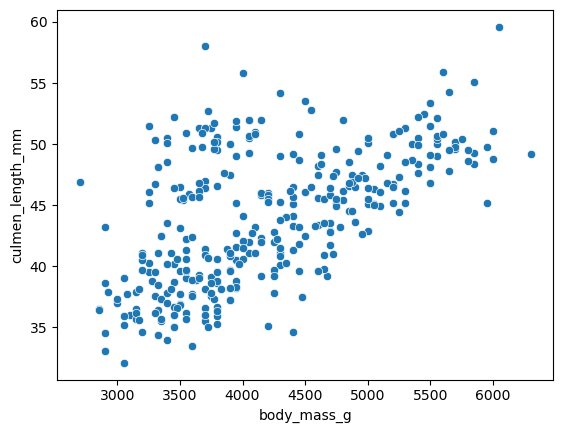

In [3]:
import seaborn as sns
sns.scatterplot(data=df, x='body_mass_g', y='culmen_length_mm')

In [4]:
train_df, _ = train_test_split(df, test_size=0.3, random_state=42)
train_df = train_df[["body_mass_g", "culmen_length_mm"]]
train_df.head()

,body_mass_g,culmen_length_mm
34,3325.0,36.4
26,3550.0,40.6
292,5100.0,48.2
302,4725.0,47.4
61,4400.0,41.3


In [5]:
model = KMeans(n_clusters=3)
model.fit(train_df)

KMeans(n_clusters=3)

In [6]:
model.cluster_centers_

array([[3535.58558559,   41.52162162],
       [5418.61702128,   48.75531915],
       [4502.96052632,   45.24473684]])

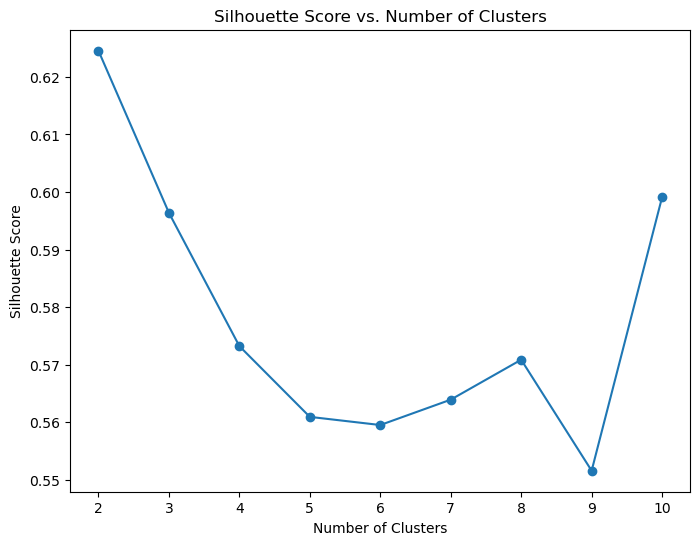

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

X_train, X_test = train_test_split(train_df, test_size=0.2, random_state=42)

cluster_range = range(2, 11)

silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

